<a href="https://colab.research.google.com/github/gracol3/PUM/blob/main/Gracjan_Golon_zajecia12-03_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

df = pd.read_csv("train.csv")
df.head()


<ipython-input-281-f900a4ffb7b8>:12: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [282]:
df.drop_duplicates(inplace=True)

In [283]:
df.shape

(100000, 28)

In [284]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [285]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').astype('string')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce').astype('float64')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype('Int64')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').astype('Int64')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').astype('float64')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce').astype('float64')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype('float64')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce').astype('float64')

In [286]:
df = df.drop(["ID", "Customer_ID", "Name", "SSN"], axis=1)

In [287]:
df.dtypes

Month                        string
Age                           Int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   Int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        Int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [288]:
czy_puste_wartosci_w_kolumnach = df.isnull().any()
print(czy_puste_wartosci_w_kolumnach)

Month                        True
Age                          True
Occupation                  False
Annual_Income                True
Monthly_Inhand_Salary        True
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                  True
Type_of_Loan                 True
Delay_from_due_date         False
Num_of_Delayed_Payment       True
Changed_Credit_Limit         True
Num_Credit_Inquiries         True
Credit_Mix                  False
Outstanding_Debt             True
Credit_Utilization_Ratio    False
Credit_History_Age           True
Payment_of_Min_Amount       False
Total_EMI_per_month         False
Amount_invested_monthly      True
Payment_Behaviour           False
Monthly_Balance              True
Credit_Score                False
dtype: bool


In [289]:
mean_age = df[df['Age'] >= 0]['Age'].mean()
df.loc[df['Age'] < 0, 'Age'] = mean_age.round()
df.loc[df['Age'] > 130, 'Age'] = mean_age.round()
df['Month'] = df['Month'].fillna("January")

In [290]:
df['Age'] = df['Age'].fillna(df['Age'].mean().round())
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean())
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].mean().round())
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean())
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].mean())
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean())
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())

In [291]:
df.dropna(subset=['Type_of_Loan'], inplace=True)


In [292]:
df.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,January,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,January,117,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,January,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [293]:
df['Credit_History_Age']= df["Credit_History_Age"].str.split( " ", expand=True )[0]+12*(df["Credit_History_Age"].str.split( " ", expand=True )[3])
df['Credit_History_Age']= df['Credit_History_Age'].astype(float)

In [294]:
# Drop outlier by IQR calculation
Q1 = df.Annual_Income.quantile(0.25)
Q3 = df.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df = df.drop(df.loc[df['Annual_Income'] > (Q3 + 1.5 *
IQR)].index)
df = df.drop(df.loc[df['Annual_Income'] < (Q1 - 1.5 *
IQR)].index)

In [295]:
# Lista kolumn zawierających zmienne kategoryczne
cols_to_encode = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Kodowanie etykiet dla wszystkich kolumn z listy cols_to_encode
label_encoder = LabelEncoder()
df[cols_to_encode] = df[cols_to_encode].apply(label_encoder.fit_transform)

# Wyświetlenie pierwszych wierszy ramki danych po zakodowaniu etykiet
print(df.head())

   Month  Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      0   23          12       19114.12            1824.843333   
1      0   23          12       19114.12            4194.170850   
2      0  117          12       19114.12            4194.170850   
3      0   23          12       19114.12            4194.170850   
4      0   23          12       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

   Type_of_Loan  ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           128  ...           3            809.98                 26.822620   
1           128  ...  

In [296]:
df.dtypes

Month                         int64
Age                           Int64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   Int64
Type_of_Loan                  int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        Int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [297]:

scaler = MinMaxScaler()
col_float = ['Annual_Income','Monthly_Inhand_Salary','Changed_Credit_Limit','Num_Credit_Inquiries',
             'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
for i in df[col_float]:
  df[i] = scaler.fit_transform(df[[i]])
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,23,12,0.073035,0.106210,3,4,3,4,128,...,3,0.16202,0.241938,220,1,0.000548,0.042284,3,0.216372,0
1,0,23,12,0.073035,0.271637,3,4,3,4,128,...,1,0.16202,0.423583,404,1,0.000548,0.062194,4,0.197078,0
2,0,117,12,0.073035,0.271637,3,4,3,4,128,...,1,0.16202,0.305298,222,1,0.000548,0.042959,5,0.229332,0
3,0,23,12,0.073035,0.271637,3,4,3,4,128,...,1,0.16202,0.403473,223,1,0.000548,0.104879,6,0.154717,0
4,0,23,12,0.073035,0.106210,3,4,3,4,128,...,1,0.16202,0.170120,224,1,0.000548,0.021780,2,0.236449,0


Age                         0.035330
Annual_Income               0.074674
Monthly_Inhand_Salary       0.065628
Delay_from_due_date         0.081919
Changed_Credit_Limit        0.184135
Credit_Mix                  0.137430
Outstanding_Debt            0.029674
Credit_Utilization_Ratio    0.011548
Credit_History_Age          0.057241
Payment_of_Min_Amount       0.168536
Amount_invested_monthly     0.061580
Payment_Behaviour           0.019994
Monthly_Balance             0.054181
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

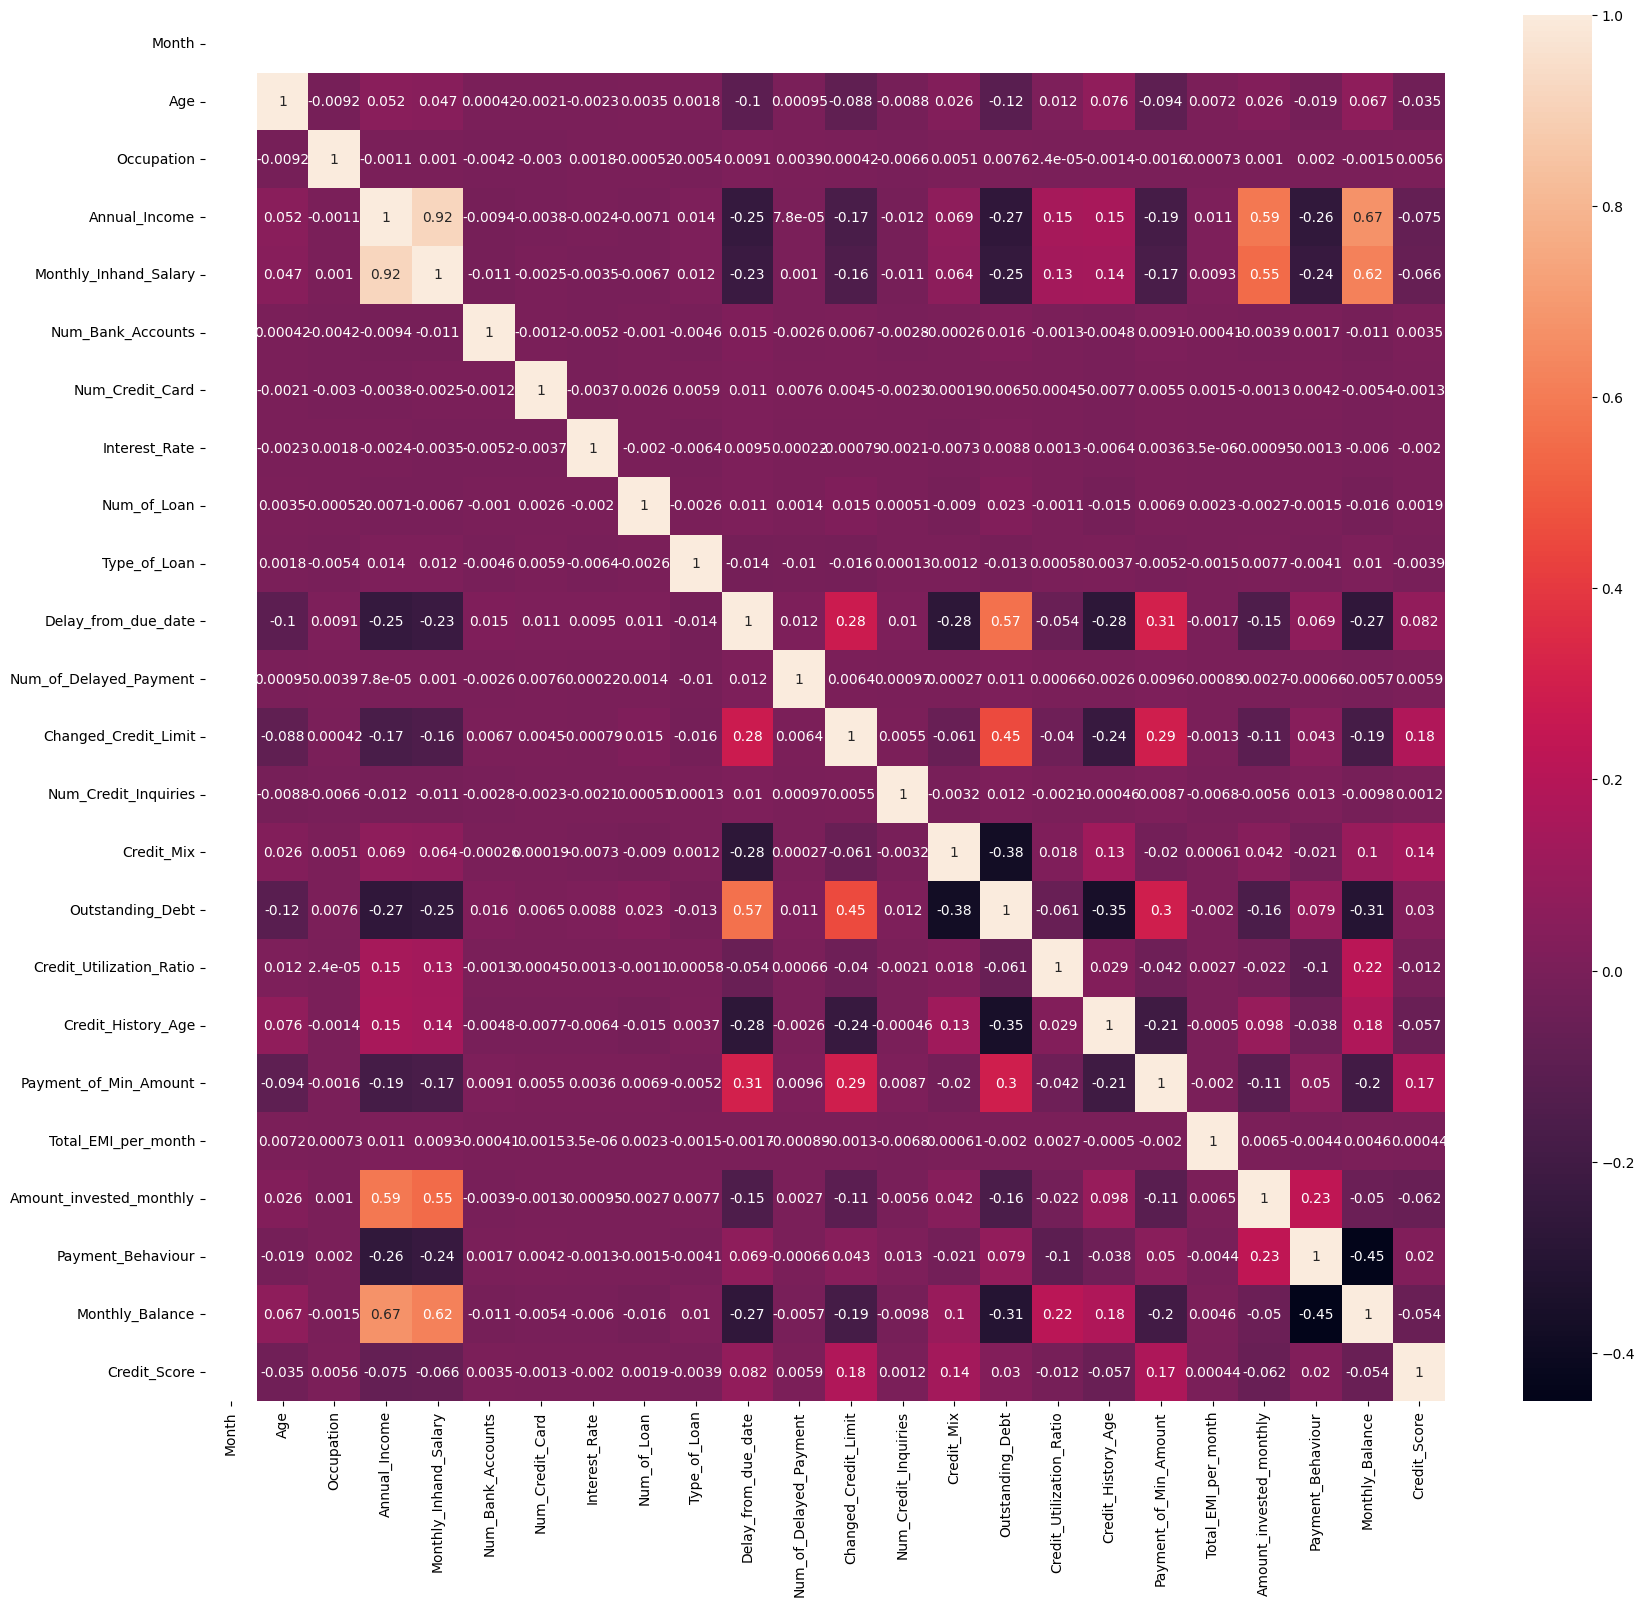

In [298]:
corr_matrix = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix,annot=True)
plt.show

corr_target = abs(corr_matrix['Credit_Score'])

relevant_features = corr_target[corr_target>0.01]
relevant_features

In [299]:
pca = PCA(n_components=24)
df2 = pca.fit(df)
print(pca.explained_variance_ratio_)

[9.12221275e-01 6.17428785e-02 1.26667218e-02 4.60214726e-03
 3.87598155e-03 3.70740332e-03 1.03665835e-03 8.13521412e-05
 5.78849126e-05 5.94893624e-06 1.14528153e-06 2.86630399e-07
 1.50832095e-07 1.10884166e-07 2.27640742e-08 9.89769706e-09
 8.70698155e-09 4.37318141e-09 2.84731625e-09 2.77153194e-09
 1.47129402e-09 1.03837052e-09 3.60387478e-10 0.00000000e+00]


In [300]:

from sklearn.model_selection import train_test_split

# Podział danych na zbiór uczący i testowy
X = df.drop('Num_of_Delayed_Payment', axis=1)  # Zastąp 'target_column' nazwą kolumny, którą chcesz przewidywać
y = df['Num_of_Delayed_Payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)